<a href="https://colab.research.google.com/github/SHAIKYASIR/MNIST-digit-recognizer/blob/main/Assignment%20-1%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
# GLOBAL VARIABLES
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)
styles=[':','-.','--','-',':','-.','--','-',':','-.','--','-']

In [26]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print(tf.__version__)

2.17.0


In [35]:
dataset =mnist.load_data()


In [3]:


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


In [27]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

[ 5833 50447 41911 48161 56300 19391 15808 19705]


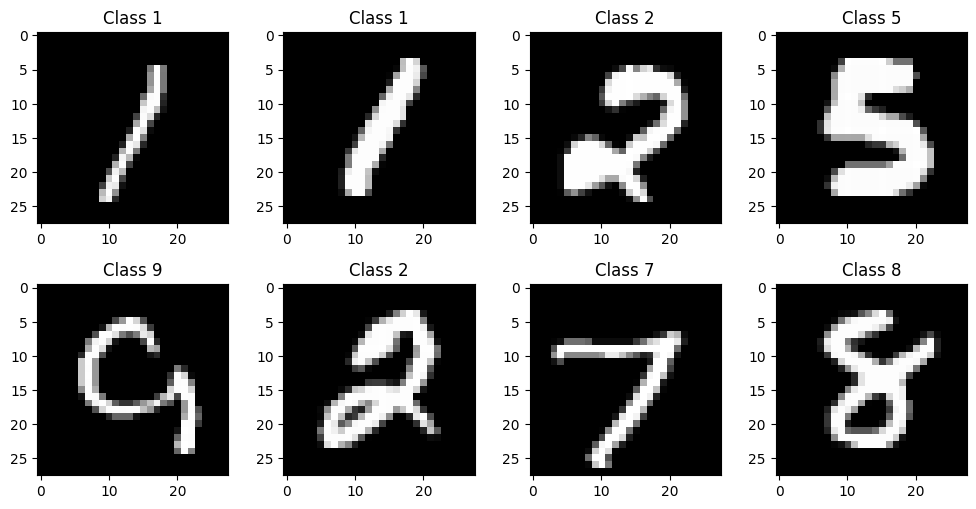

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10)) # set size of figure 10x10
rand_indexes = np.random.randint(0, x_train.shape[0], 8) # select 8 digits(0~9) randomly
print(rand_indexes)

for index,im_index in enumerate(rand_indexes):
    plt.subplot(4, 4, index+1)
    plt.imshow(x_train[im_index], cmap = 'gray', interpolation = 'none')
    plt.title('Class %d' % y_train[im_index])
plt.tight_layout()

Text(0.5, 1.0, '1')

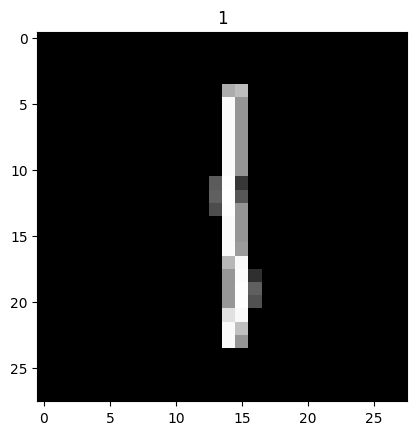

In [5]:

plt.imshow(X_train[1002], cmap='gray')
plt.title(y_train[1002])

Text(0.5, 1.0, '7')

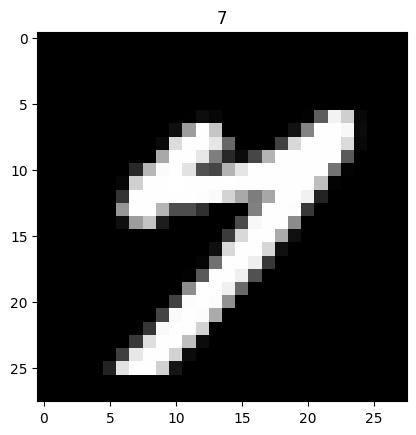

In [6]:

plt.imshow(X_train[1001], cmap='gray')
plt.title(y_train[1001])

In [7]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255

In [9]:
number_of_classes = 10

Y_train = to_categorical(y_train, number_of_classes)
Y_test = to_categorical(y_test, number_of_classes)


In [10]:
model = Sequential()
model.add(Dense(512, input_dim=784,activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Dense(32, input_dim=10, activation= 'relu' ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(Dense(256,activation='relu'))

In [12]:
model.add(Dense(128,activation='relu'))

In [13]:

model.add(Dense(10,activation='softmax'))


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
size = int(len(X_train) * 0.8)
train_x, val_x = X_train[:size], X_train[size:]
train_y, val_y = Y_train[:size], Y_train[size:]

In [18]:
hist = model.fit(train_x, train_y, batch_size=128, epochs=4, validation_data=(val_x, val_y))

Epoch 1/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9686 - loss: 0.1003 - val_accuracy: 0.9679 - val_loss: 0.1047
Epoch 2/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9816 - loss: 0.0600 - val_accuracy: 0.9708 - val_loss: 0.0932
Epoch 3/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9866 - loss: 0.0423 - val_accuracy: 0.9758 - val_loss: 0.0763
Epoch 4/4
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9914 - loss: 0.0269 - val_accuracy: 0.9745 - val_loss: 0.0900


In [19]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9706 - loss: 19.2171

Test accuracy:  0.9765999913215637


In [21]:
import numpy as np
from keras.preprocessing import image
result = model.predict(X_train)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [22]:
result[1000]

array([9.9992388e-01, 6.2982444e-08, 4.1133626e-06, 3.7260889e-08,
       2.4624043e-08, 2.3332493e-07, 7.9624497e-06, 2.9813472e-07,
       1.0635457e-06, 6.2317260e-05], dtype=float32)